In [279]:
# set your wd
setwd("/Users/hernanat/school/summer/data-analytics/project")
# police shootings 2015-2018
shooting_data <<- read.csv('fatal-police-shootings-data.csv', header = TRUE, na.strings = c("", "NA"))

# census data and estimates
# https://factfinder.census.gov/bkmk/table/1.0/en/PEP/2017/PEPASR6H?slice=hisp~totpop
census_data <<- read.csv('census-data.csv', header = TRUE, stringsAsFactors = FALSE)

# we want to look at cases where the age is known
age_known <<- shooting_data[complete.cases(shooting_data$age),]

# display names for race categories
race_categories <- c("Overall", "Asian", "Black", "Hispanic",
                     "Native American", "White", "Other", "Unknown")
# codes WaPo uses to identify race, plus default 'overall'
race_codes <<- c('overall', 'A', 'B', 'H', 'N', 'W', 'O', NA)

In [258]:
# subsets of data based on race / gender codes
getDataSubset <- function(raceCode = 'overall', genderCode = 'ANY') {
  if (is.na(raceCode)) {
    sub = subset(age_known, is.na(race))
  } else if (raceCode == 'overall') {
    sub = age_known
  } else {
    sub = subset(age_known, race == raceCode)
  }
  
  if(genderCode != 'ANY')
    sub = subset(sub, gender == genderCode)
  sub
}


In [259]:
# summary by race / gender codes
calculateSummary <- function(raceCode = 'overall', genderCode = 'ANY') {
  ages = getDataSubset(raceCode, genderCode)$age
  
  c(fivenum(ages), mean(ages), length(ages)) 
}

In [260]:
# all race summaries by gender code
allAgeSummaries <- function(genderCode = 'ANY') {
  together = cbind(
    sapply(
      race_codes,
      function(raceCode) { calculateSummary(raceCode, genderCode) }
    )
  )
  
  colnames(together) <- race_categories 
  rownames(together) <- c("Min", "1st Qu.", "Median", "3rd Qu.", "Max", "Mean", "Size")
  
  together
}

In [287]:
# boxplots for race categories based on gender code
boxPlots <- function(genderCode = 'ANY') {
  
  boxplot(
    age~race,
    getDataSubset(genderCode = genderCode),
    ylab = 'Age',
    col = 'cyan',
    border = c('blue'),
    names = c(
      'Asian',
      'Black',
      'Hispanic',
      'Native American',
      'Other',
      'White'
    )
  )
  
  plot_title <- switch(
    genderCode,
    'ANY' = 'Male & Female Police Shootings by Race / Ethnicity',
    'M' = 'Male Police Shootings by Race / Ethnicity',
    'F' = 'Female Police Shootings by Race / Ethnicity'
  )
  
  title(plot_title)
}

,Overall,Asian,Black,Hispanic,Native American,White,Other,Unknown
Min,6.00000,15.00000,13.00000,14.00000,14.00000,6.00000,18.00000,6.0000
1st Qu.,27.00000,27.00000,24.00000,25.00000,24.00000,29.00000,25.00000,32.0000
Median,35.00000,33.50000,30.00000,32.00000,30.00000,38.00000,29.00000,40.0000
3rd Qu.,45.00000,42.00000,38.00000,39.00000,36.00000,49.00000,39.50000,54.0000
Max,91.00000,61.00000,77.00000,80.00000,53.00000,91.00000,56.00000,86.0000
Mean,36.84012,34.94231,32.21509,33.26364,30.75926,39.80187,32.53125,43.2511
Size,3315.00000,52.00000,795.00000,550.00000,54.00000,1605.00000,32.00000,227.0000


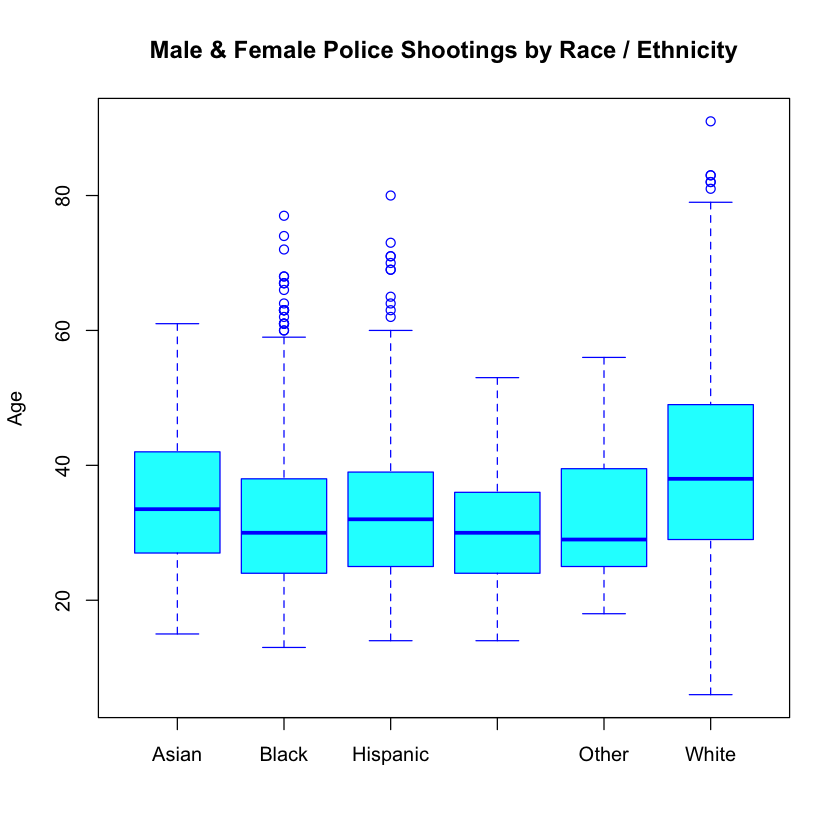

In [285]:
# all race-age summaries
mf_all_age_summaries = allAgeSummaries()
mf_all_age_summaries
boxPlots()

,Overall,Asian,Black,Hispanic,Native American,White,Other,Unknown
Min,6.00000,15.00,13.00000,14.000,14.00000,6.00000,18.00000,6.0
1st Qu.,27.00000,27.00,24.00000,25.000,24.00000,30.00000,25.00000,32.0
Median,35.00000,33.00,30.00000,32.000,30.00000,38.00000,29.00000,40.0
3rd Qu.,45.00000,43.00,38.00000,39.000,35.00000,50.00000,38.00000,54.0
Max,91.00000,61.00,77.00000,80.000,53.00000,91.00000,56.00000,86.0
Mean,36.84191,34.88,32.16667,33.282,30.71429,39.87031,32.13333,43.3
Size,3169.00000,50.00,762.00000,539.000,49.00000,1519.00000,30.00000,220.0


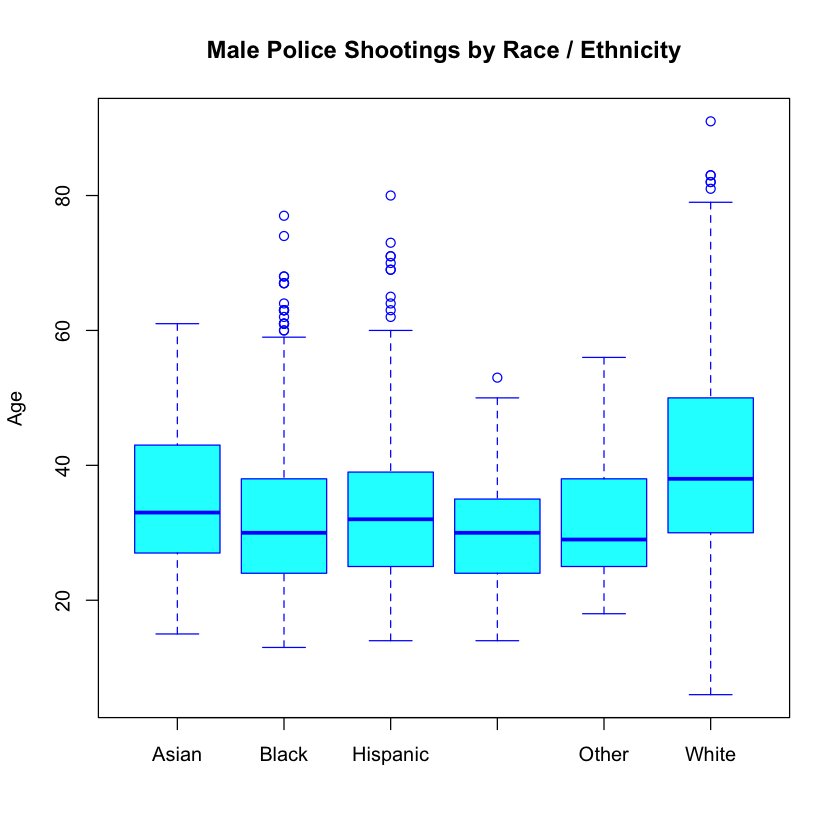

In [263]:
# all race-age summaries by gender - male
allAgeSummaries(genderCode = 'M')
boxPlots('M')

,Overall,Asian,Black,Hispanic,Native American,White,Other,Unknown
Min,12.00000,36.0,20.00000,16.00000,23.0,12.0,27.0,20.00000
1st Qu.,27.00000,36.0,25.00000,26.00000,27.0,28.0,27.0,33.00000
Median,36.00000,36.5,30.00000,31.00000,32.0,39.0,38.5,38.00000
3rd Qu.,46.00000,37.0,38.00000,37.50000,36.0,48.0,50.0,53.00000
Max,72.00000,37.0,72.00000,54.00000,38.0,71.0,50.0,62.00000
Mean,36.91034,36.5,33.33333,32.36364,31.2,38.8,38.5,41.71429
Size,145.00000,2.0,33.00000,11.00000,5.0,85.0,2.0,7.00000


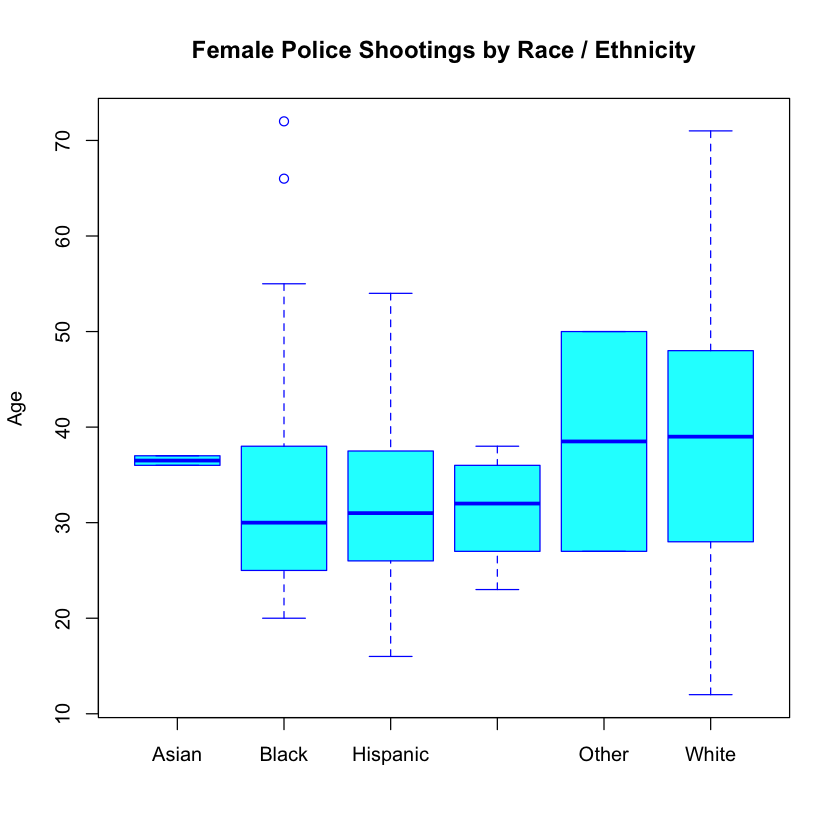

In [264]:
# all race-age summaries by gender - female
allAgeSummaries(genderCode = 'F')
boxPlots('F')

In [265]:
# 2010 census data
# will use for exploring shootings proportional to total population number
census_2010 = subset(census_data, year.id == "cen42010" & GEO.id == "0100000US") 
# totals - Hispanic + non-Hispanic
census_2010_totals = subset(census_2010, hisp.display.label == 'Total')

# WaPo data broken down by Hispanic / non-Hispanic
census_2010_hispanic = subset(census_2010, hisp.display.label == 'Hispanic')
census_2010_non_hispanic = subset(census_2010, hisp.display.label == 'Not Hispanic')

In [266]:
# see census metadata csv for sex and age information
populationTotals <- function(sex='0', age='999'){
  # see census metadata for population prefixes
  demographics = c('totpop', 'aa', 'ba', 'ia', 'wa')
  keys = sapply(
    demographics,
    function(prefix) {
      paste(prefix, paste("sex", sex, sep=""), paste("age", age, sep=""), sep="_")
    }
  )
  population_totals = data.frame(
    as.numeric(census_2010_totals[keys[1]]),
    as.numeric(census_2010_non_hispanic[keys[2]]),
    as.numeric(census_2010_non_hispanic[keys[3]]),
    as.numeric(census_2010_hispanic[keys[1]]),
    as.numeric(census_2010_non_hispanic[keys[4]]),
    as.numeric(census_2010_non_hispanic[keys[5]]),
    NA,
    NA
  )
  
  colnames(population_totals) <- race_categories
  rownames(population_totals) <- c('Total')
    
  population_totals
}

In [267]:
# overall
mf_population_totals <<- populationTotals()
mf_population_totals

,Overall,Asian,Black,Hispanic,Native American,White,Other,Unknown
Total,308745538,14661516,37922522,50477594,2263258,197318956,NA,NA


In [268]:
populationPercent <- function(num) {
    as.numeric(num / mf_population_totals['Overall'])
}

In [269]:
mf_population_percent_black = populationPercent(mf_population_totals['Black'])
mf_population_percent_black

[1] 0.1228278

In [270]:
mf_population_percent_hispanic = populationPercent(mf_population_totals['Hispanic'])
mf_population_percent_hispanic

[1] 0.1634925

In [271]:
mf_population_percent_white = populationPercent(mf_population_totals['White'])
mf_population_percent_white

[1] 0.639099

In [272]:
# male/female shootings totals
mf_shootings_total <<- mf_all_age_summaries[,1]['Size']
mf_shootings_black = mf_all_age_summaries[,3]['Size']
mf_shootings_hispanic = mf_all_age_summaries[,4]['Size']
mf_shootings_white = mf_all_age_summaries[,6]['Size']

In [273]:
shootingRatio <- function(num) {
    as.numeric(num / mf_shootings_total)
}

In [274]:
# shooting % by race / ethnicity
mf_shootings_percent_black = shootingRatio(mf_shootings_black)
mf_shootings_percent_hispanic = shootingRatio(mf_shootings_hispanic)
mf_shootings_percent_white = shootingRatio(mf_shootings_white)

mf_shootings_percent_black
mf_shootings_percent_hispanic
mf_shootings_percent_white

[1] 0.239819

[1] 0.1659125

[1] 0.4841629

In [275]:
# shootings / population
mf_shootings_to_pop_black = as.numeric(mf_shootings_black / mf_population_totals['Black'])
mf_shootings_to_pop_hispanic = as.numeric(mf_shootings_hispanic / mf_population_totals['Hispanic'])
mf_shootings_to_pop_white = as.numeric(mf_shootings_white / mf_population_totals['White'])


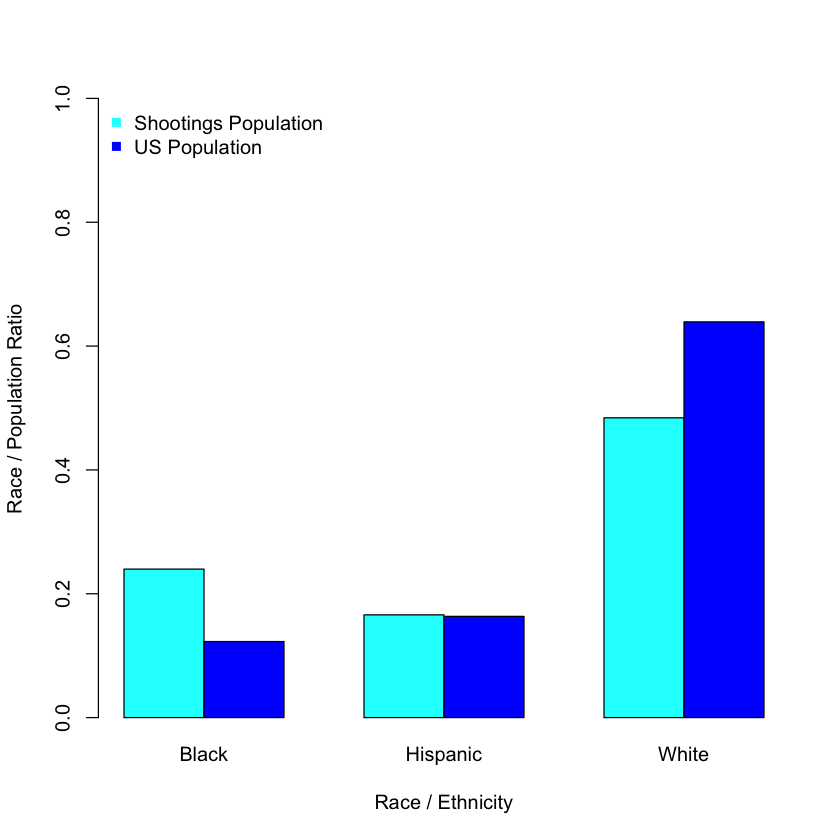

In [276]:
pop_data = c(
    mf_shootings_percent_black,
    mf_population_percent_black,
    mf_shootings_percent_hispanic,
    mf_population_percent_hispanic,
    mf_shootings_percent_white,
    mf_population_percent_white
)

pop_data_matrix = matrix(pop_data, ncol=3)
colnames(pop_data_matrix) <- c('Black', 'Hispanic', 'White')

barplot(
    matrix(pop_data, ncol=3),
    col = c('cyan', 'blue'), 
    beside = TRUE,
    xlab = 'Race / Ethnicity',
    ylab = 'Race / Population Ratio',
    ylim = 0:1,
    names = colnames(pop_data_matrix)
)

legend("topleft", c("Shootings Population","US Population"), pch=15, 
       col=c("cyan","blue"), 
       bty="n")

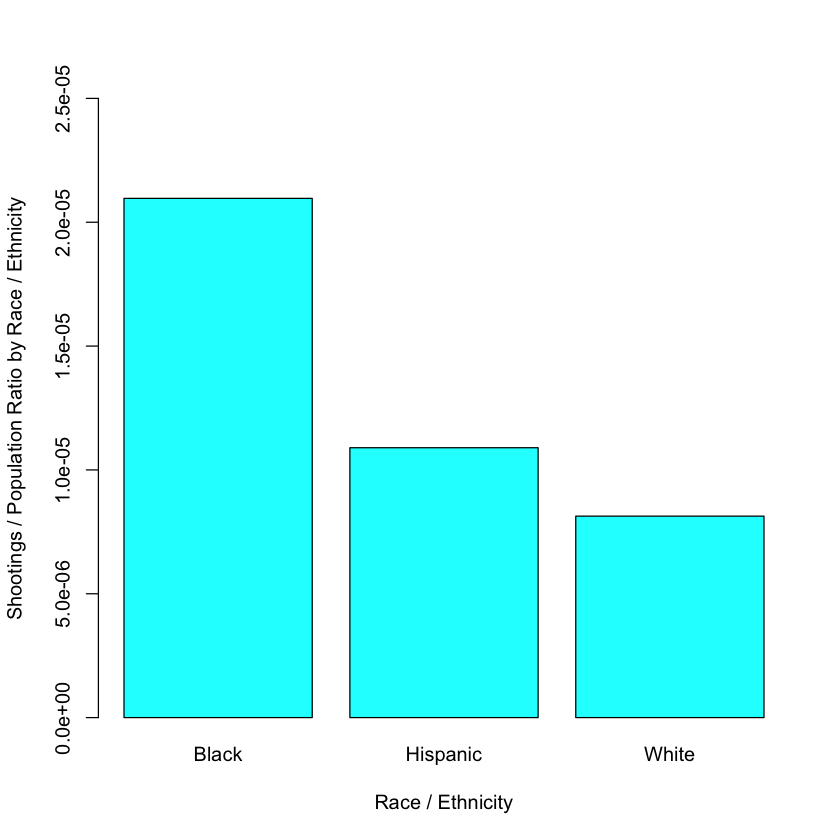

In [277]:
shootings_to_pop_ratios = c(
    mf_shootings_to_pop_black,
    mf_shootings_to_pop_hispanic,
    mf_shootings_to_pop_white
)

shootings_to_pop_ratio_matrix = matrix(shootings_to_pop_ratios, ncol=3)
colnames(shootings_to_pop_ratio_matrix) <- colnames(pop_data_matrix)

barplot(
    shootings_to_pop_ratio_matrix,
    col = c('cyan'),
    names = colnames(shootings_to_pop_ratio_matrix),
    xlab = 'Race / Ethnicity',
    ylab = 'Shootings / Population Ratio by Race / Ethnicity',
    ylim = range(pretty(c(0, shootings_to_pop_ratio_matrix)))
)

In [278]:
# black / hispanic ratio
mf_shootings_to_pop_black / mf_shootings_to_pop_hispanic

# black / white ratio
mf_shootings_to_pop_black/ mf_shootings_to_pop_white

# hispanic / white ratio
mf_shootings_to_pop_hispanic / mf_shootings_to_pop_white

[1] 1.924004

[1] 2.577292

[1] 1.339547